<a href="https://www.kaggle.com/code/sepehrmoghani/business-logistics-analysis?scriptVersionId=264775979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Customer Analysis
In this report, I am analysing data provided by a fictitious customer in transport and logistics sector, showing the expenses of transporting goods between two different postcodes. This data also provides each item's cubic size, weight, and original cost.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/business-quote-sample/Business Quote.xlsx")
df = df.rename(columns={'Calculated Distance': 'Connote Number', 'Service Type': 'Carrier', 'Unit Type': 'Service', 'Unit Value': 'Qty'})
df.head()

,Date,From,To,Carrier,Service,Qty,Cubic Size,Weight,Original Cost,Connote Number
0,2023-09-04 10:00:00,2164,2320,carrier_E,Parcels Overnight,1,0.0010,22.0,26.80,sample_00001
1,2023-09-18 00:00:00,2526,2650,carrier_B,Fixed Price Premium,1,0.0050,3.0,15.53,sample_00002
2,2023-09-18 00:00:00,2526,6104,carrier_E,Australia Wide 1kg Satchel Overnight,1,0.0022,1.0,14.59,sample_00003
3,2023-09-18 00:00:00,2526,3629,carrier_E,Australia Wide 1kg Satchel Overnight,1,0.0022,1.0,14.59,sample_00004
4,2023-09-18 00:00:00,2526,3043,carrier_E,Australia Wide 3kg Satchel Overnight,1,0.0040,3.0,18.28,sample_00005


In [3]:
# Removing none numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_dataset = df[numerical_columns]
numerical_dataset

,From,To,Qty,Cubic Size,Weight,Original Cost
0,2164,2320,1,0.0010,22.00,26.80
1,2526,2650,1,0.0050,3.00,15.53
2,2526,6104,1,0.0022,1.00,14.59
3,2526,3629,1,0.0022,1.00,14.59
4,2526,3043,1,0.0040,3.00,18.28
...,...,...,...,...,...,...
2152,2526,4073,1,0.5800,272.00,111.69
2153,4073,4350,1,0.0200,6.66,79.19
2154,2526,4073,1,0.6700,358.00,142.00
2155,3166,2450,1,0.1400,46.62,95.02


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

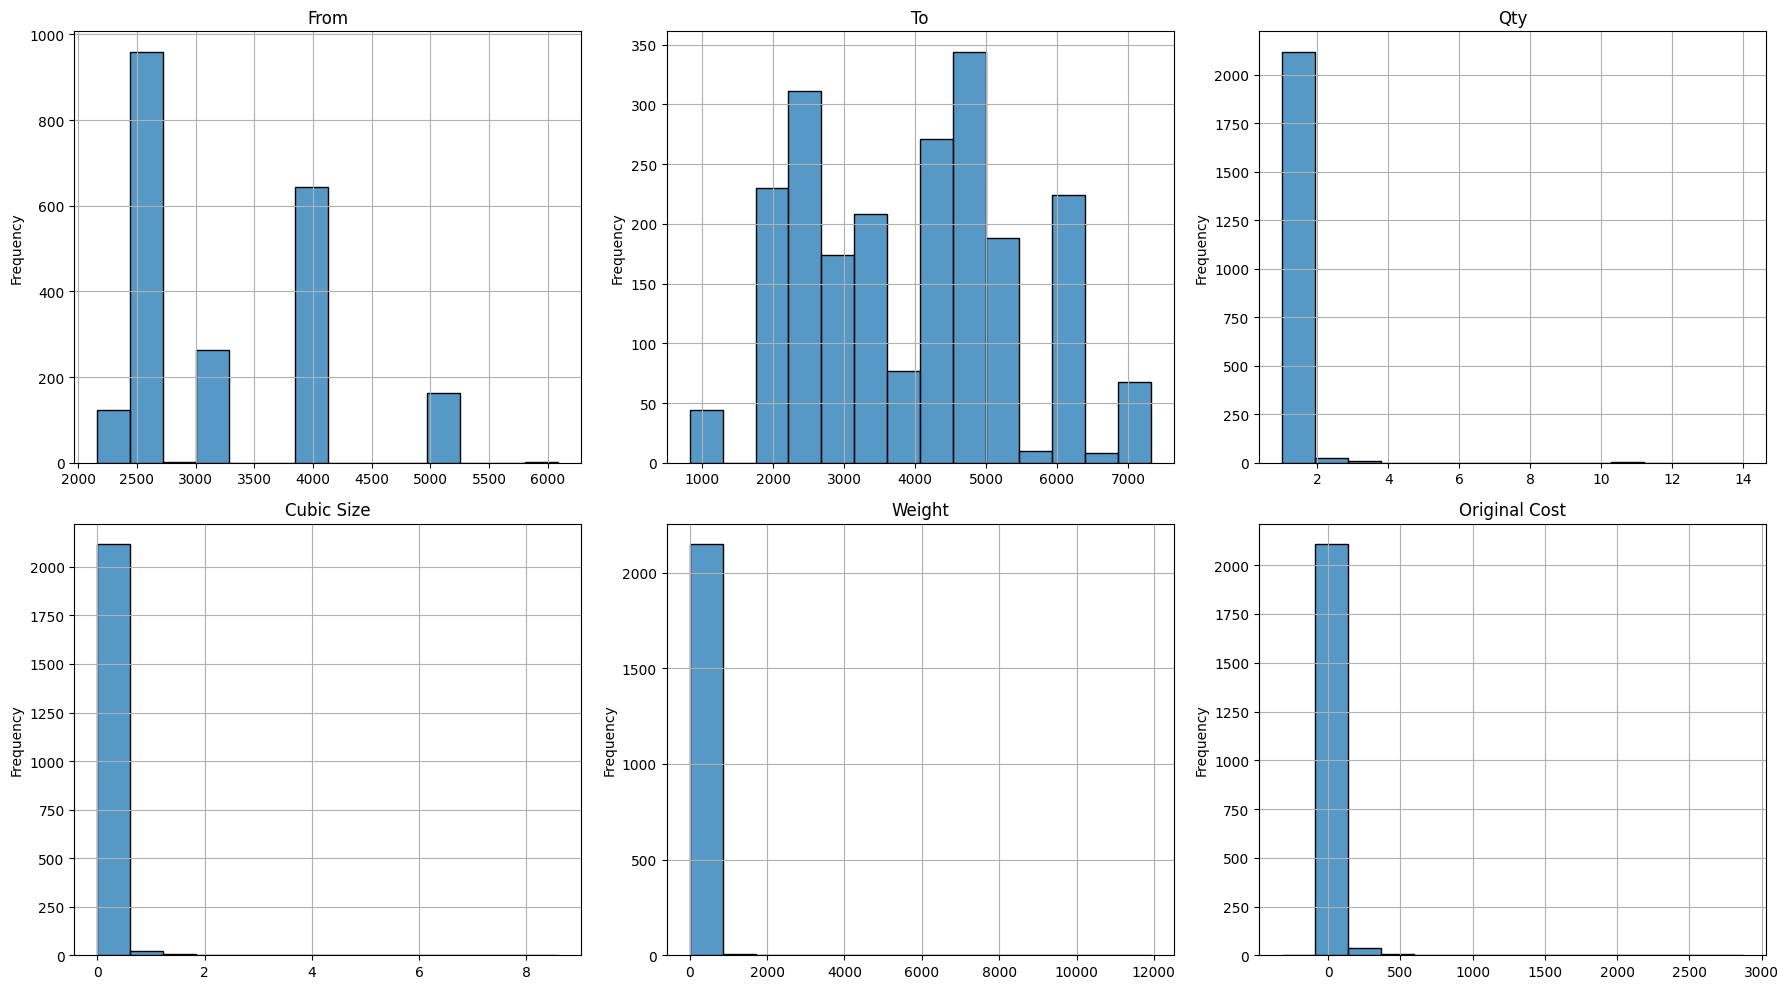

In [4]:
num_rows = 2 
num_cols = 3  
nbins = 14

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))

axes = axes.flatten()

for i, column in enumerate(numerical_dataset.columns):
    ax = axes[i]  # Get the current axis
    sns.histplot(df[column], bins=nbins, ax=ax )  
    ax.set_title(column)  
    ax.set_xlabel('')  
    ax.set_ylabel('Frequency')  
    ax.grid(True)  

plt.tight_layout()
plt.show()

Now We visualise Cubic vs Weight in a scatterplot chart with the fitted line.

/tmp/ipykernel_13/957636232.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.text(float(x.min()), float(y.max())*0.9, equation, fontsize=12, color='red')


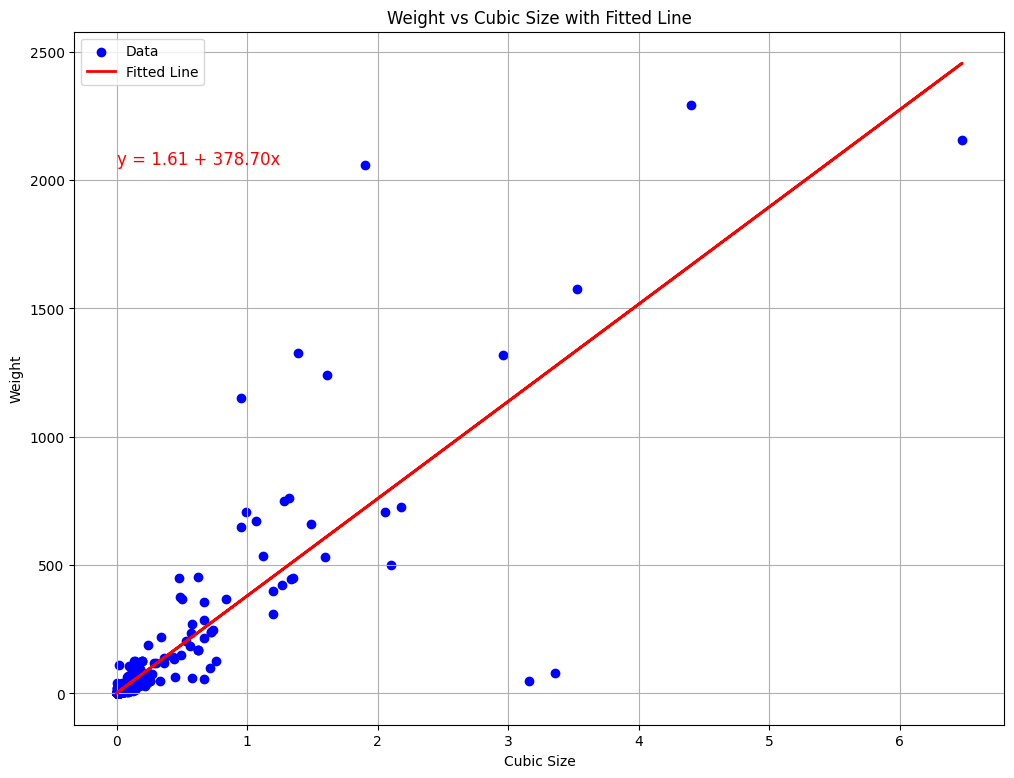

Slope (θ1): 378.6992079702006
Intercept (θ0): 1.6139757893442415


In [5]:
index_12000= df[df['Weight'] == 11916].index
df_removed = df.drop(index_12000) # removed the outliner of the data

attribute1 = 'Cubic Size'
attribute2 = 'Weight'

x = df_removed[[attribute1]]  # must be 2D for sklearn
y = np.abs(df_removed[attribute2])

# Fit linear regression
model = LinearRegression()
model.fit(x, y)

theta1 = model.coef_[0]      # slope
theta0 = model.intercept_    # intercept

# Predictions for fitted line
y_pred = model.predict(x)

# Plot scatter and fitted line
plt.figure(figsize=(12, 9))
plt.scatter(x, y, color='blue', marker='o', label='Data')
plt.plot(x, y_pred, color='red', linewidth=2, label='Fitted Line')

# Add regression equation text to the plot
equation = f"y = {theta0:.2f} + {theta1:.2f}x"
plt.text(float(x.min()), float(y.max())*0.9, equation, fontsize=12, color='red')

plt.xlabel(attribute1)
plt.ylabel(attribute2)
plt.title(f'{attribute2} vs {attribute1} with Fitted Line')
plt.legend()
plt.grid(True)
plt.show()

print("Slope (θ1):", theta1)
print("Intercept (θ0):", theta0)


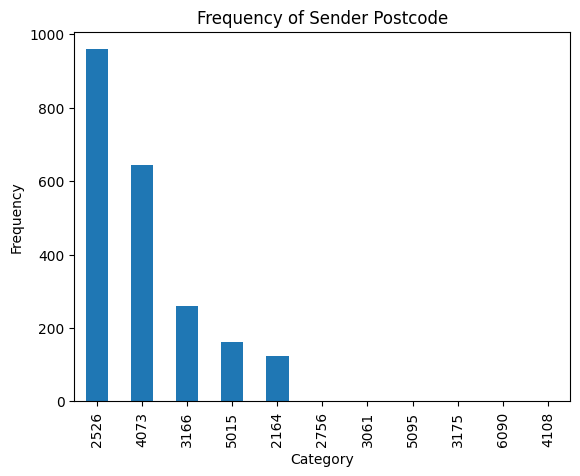

In [6]:
from_value_counts = df['From'].value_counts()

from_value_counts.plot(kind='bar')

plt.title('Frequency of Sender Postcode')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [7]:
from_value_counts

From
2526    959
4073    643
3166    261
5015    163
2164    123
2756      2
3061      2
5095      1
3175      1
6090      1
4108      1
Name: count, dtype: int64

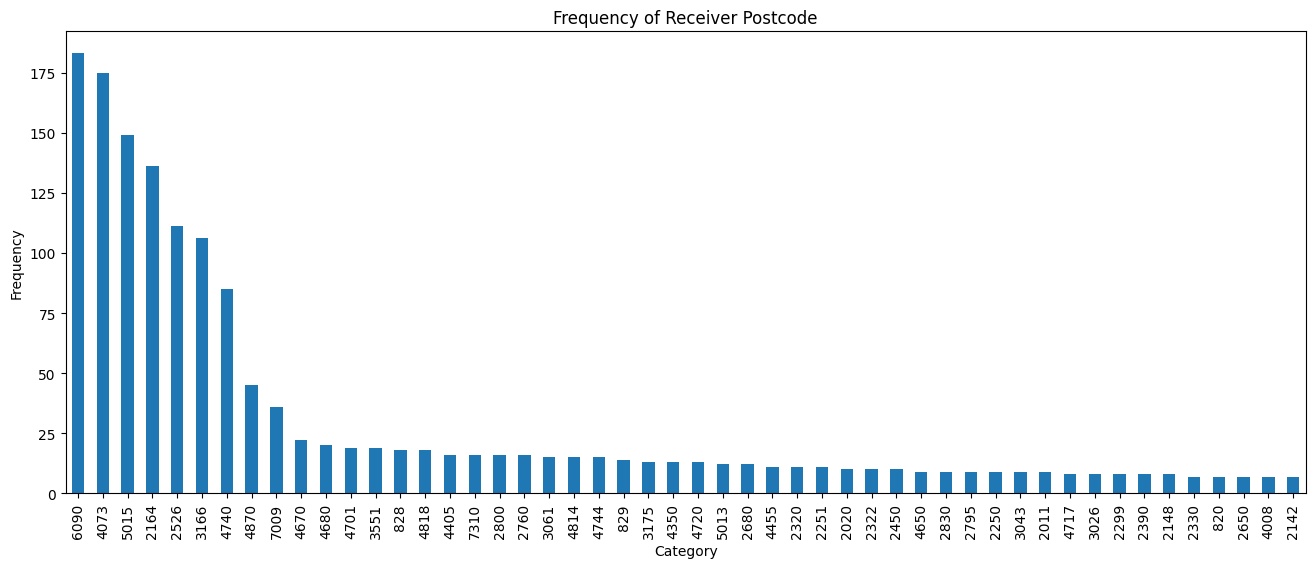

In [8]:
to_value_counts = df['To'].value_counts().head(50) # Top 50 most frequent postcode

plt.figure(figsize=(16, 6))
to_value_counts.plot(kind='bar')

plt.title('Frequency of Receiver Postcode')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [9]:
to_value_counts

To
6090    183
4073    175
5015    149
2164    136
2526    111
3166    106
4740     85
4870     45
7009     36
4670     22
4680     20
4701     19
3551     19
828      18
4818     18
4405     16
7310     16
2800     16
2760     16
3061     15
4814     15
4744     15
829      14
3175     13
4350     13
4720     13
5013     12
2680     12
4455     11
2320     11
2251     11
2020     10
2322     10
2450     10
4650      9
2830      9
2795      9
2250      9
3043      9
2011      9
4717      8
3026      8
2299      8
2390      8
2148      8
2330      7
820       7
2650      7
4008      7
2142      7
Name: count, dtype: int64

### Missing Not at Random (MNAR)

In some cases, customers do not trust the broker or have very high data security measures so they leave out the original cost or carriers or connote number or a combination. Also some carriers deliberately leave some details oout from their statements so their customers can't use that source to shop around.

The missing data is related to the value of the data that is missing. The chance of missingness is directly related to the unobserved data. In other words, the likelihood that data is missing depends on the value of the data itself, meaning that the missingness is directly related to information we don’t have. `(CITS2402-Lec4)`

Now We visualuse Cubic vs Weight in a scatterplot chart with the fitted line.